In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# How many distinctive career trajectories are there?
- use clustering on growth trajectories. Make key stats the vectors.
- subset on only the complete careers

UPDATE: careers are not separating very well. 
Need to change my methodology to allow for dipping of production, and perhaps normalise features together.
UPDATE2: careers separating alot better now due to rolling subtraction of normalised stat

In [2]:
#Read in player logs
hist_player_log_full = pd.read_pickle('player_log_complete')
hist_player_log_full['Date'] = hist_player_log_full['GAME_DATE'].apply(lambda x: datetime.strptime(x, '%b %d, %Y'))
#eliminate existing playoff games that were pulled
hist_player_log_full = hist_player_log_full[~(hist_player_log_full['SEASON_ID'].isin([42015,42016,42017]))]
hist_player_log_full.to_pickle('player_log_complete2')
#Read in player info
hist_player_info = pd.read_pickle('hist_player_info')

In [3]:
hist_player_log_full=hist_player_log_full.merge(hist_player_info, left_on='Player_ID', right_on='PERSON_ID')
hist_player_log_full.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,VIDEO_AVAILABLE,full_name,Date,PERSON_ID,BIRTHDATE,FROM_YEAR,TO_YEAR,HEIGHT,WEIGHT,POSITION
0,22000,51,20001188,"APR 18, 2001",VAN @ GSW,W,21,7,12,0.583,...,0,Mahmoud Abdul-Rauf,2001-04-18,51,1969-03-09T00:00:00,1990,2000,73,162,Guard
1,22000,51,20001169,"APR 16, 2001",VAN @ SAC,L,17,5,10,0.500,...,0,Mahmoud Abdul-Rauf,2001-04-16,51,1969-03-09T00:00:00,1990,2000,73,162,Guard
2,22000,51,20001153,"APR 14, 2001",VAN vs. HOU,L,23,12,19,0.632,...,0,Mahmoud Abdul-Rauf,2001-04-14,51,1969-03-09T00:00:00,1990,2000,73,162,Guard
3,22000,51,20001137,"APR 12, 2001",VAN vs. POR,L,16,3,9,0.333,...,0,Mahmoud Abdul-Rauf,2001-04-12,51,1969-03-09T00:00:00,1990,2000,73,162,Guard
4,22000,51,20001124,"APR 10, 2001",VAN vs. MIN,L,9,4,7,0.571,...,0,Mahmoud Abdul-Rauf,2001-04-10,51,1969-03-09T00:00:00,1990,2000,73,162,Guard


In [4]:
hist_player_log_full[hist_player_log_full['full_name']=='LeBron James'].head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,VIDEO_AVAILABLE,full_name,Date,PERSON_ID,BIRTHDATE,FROM_YEAR,TO_YEAR,HEIGHT,WEIGHT,POSITION
143471,22003,2544,20301179,"APR 14, 2004",CLE @ NYK,W,35,8,17,0.471,...,0,LeBron James,2004-04-14,2544,1984-12-30T00:00:00,2003,2018,80,250,Forward
143472,22003,2544,20301162,"APR 12, 2004",CLE vs. MIL,W,45,9,20,0.450,...,0,LeBron James,2004-04-12,2544,1984-12-30T00:00:00,2003,2018,80,250,Forward
143473,22003,2544,20301151,"APR 10, 2004",CLE vs. MIA,W,32,4,11,0.364,...,0,LeBron James,2004-04-10,2544,1984-12-30T00:00:00,2003,2018,80,250,Forward
143474,22003,2544,20301137,"APR 09, 2004",CLE @ MIA,L,42,6,14,0.429,...,0,LeBron James,2004-04-09,2544,1984-12-30T00:00:00,2003,2018,80,250,Forward
143475,22003,2544,20301128,"APR 07, 2004",CLE @ MEM,L,36,4,11,0.364,...,0,LeBron James,2004-04-07,2544,1984-12-30T00:00:00,2003,2018,80,250,Forward


In [5]:
print(hist_player_log_full['FROM_YEAR'].min())
print(hist_player_log_full['Date'].apply(lambda x: x.year).min())
print(hist_player_log_full['Date'].apply(lambda x: x.year).max())
print(hist_player_log_full['TO_YEAR'].max())
#Create a 'full career' flag, indicating that we have a player's entire career, start to finish, in the dataset


1976
1994
2019
2018


In [4]:
min_career_year = hist_player_log_full['Date'].apply(lambda x: x.year).min()
max_career_year = hist_player_log_full['Date'].apply(lambda x: x.year).max()-2

In [5]:
hist_player_log_full['full_career_flag'] = np.where((hist_player_log_full['FROM_YEAR']>=min_career_year) & (hist_player_log_full['TO_YEAR']<=max_career_year) , 1, 0)

In [6]:
#Turn name and key into a dictionary
full_careers=dict(zip(hist_player_log_full[hist_player_log_full['full_career_flag']==1]['Player_ID'],
                      hist_player_log_full[hist_player_log_full['full_career_flag']==1]['full_name']))
print('amount of full careers: '+ str(len(full_careers)))

amount of full careers: 1315


# To do list:
- Grab more player data. We want to go back to 2000 so we have more complete careers.

In [9]:
hist_player_log_full.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,full_name,Date,PERSON_ID,BIRTHDATE,FROM_YEAR,TO_YEAR,HEIGHT,WEIGHT,POSITION,full_career_flag
0,22000,51,20001188,"APR 18, 2001",VAN @ GSW,W,21,7,12,0.583,...,Mahmoud Abdul-Rauf,2001-04-18,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0
1,22000,51,20001169,"APR 16, 2001",VAN @ SAC,L,17,5,10,0.500,...,Mahmoud Abdul-Rauf,2001-04-16,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0
2,22000,51,20001153,"APR 14, 2001",VAN vs. HOU,L,23,12,19,0.632,...,Mahmoud Abdul-Rauf,2001-04-14,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0
3,22000,51,20001137,"APR 12, 2001",VAN vs. POR,L,16,3,9,0.333,...,Mahmoud Abdul-Rauf,2001-04-12,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0
4,22000,51,20001124,"APR 10, 2001",VAN vs. MIN,L,9,4,7,0.571,...,Mahmoud Abdul-Rauf,2001-04-10,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0


In [10]:
hist_player_log_full.columns

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE', 'full_name', 'Date',
       'PERSON_ID', 'BIRTHDATE', 'FROM_YEAR', 'TO_YEAR', 'HEIGHT', 'WEIGHT',
       'POSITION', 'full_career_flag'],
      dtype='object')

In [7]:
stat_columns = ['FGM','FGA', 'FG3M', 'FTM', 'REB', 'AST', 'STL', 'BLK', 'PTS']

In [12]:
hist_player_log_full.groupby(['full_name', 'SEASON_ID']).agg({k: 'sum' for k in stat_columns}).head()

FGM    FGA  FG3M  FTM    REB    AST   STL   BLK  PTS
full_name  SEASON_ID                                                      
A.C. Green 22000      144  324.0   0.0   79  313.0   39.0  30.0   8.0  367
           21994      311  617.0  43.0  251  669.0  127.0  55.0  31.0  916
           21995      215  444.0  14.0  168  554.0   72.0  45.0  23.0  612
           21996      234  484.0   1.0  128  656.0   69.0  70.0  16.0  597
           21997      242  534.0   0.0  116  668.0  123.0  78.0  27.0  600

In [8]:
hist_player_log_full['date_rank'] = hist_player_log_full.groupby('full_name')['Date'].rank('dense', ascending=True)

C:\Users\miah.stewart\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


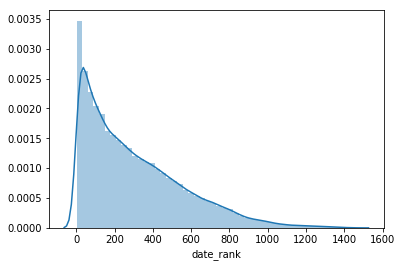

In [17]:
#Distribution of amount of games played in career so far for players with full career data
sns.distplot(hist_player_log_full[hist_player_log_full['full_name'].isin(full_careers.values())]['date_rank'])

In [18]:
hist_player_log_full.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,Date,PERSON_ID,BIRTHDATE,FROM_YEAR,TO_YEAR,HEIGHT,WEIGHT,POSITION,full_career_flag,date_rank
0,22000,51,20001188,"APR 18, 2001",VAN @ GSW,W,21,7,12,0.583,...,2001-04-18,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0,277.0
1,22000,51,20001169,"APR 16, 2001",VAN @ SAC,L,17,5,10,0.500,...,2001-04-16,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0,276.0
2,22000,51,20001153,"APR 14, 2001",VAN vs. HOU,L,23,12,19,0.632,...,2001-04-14,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0,275.0
3,22000,51,20001137,"APR 12, 2001",VAN vs. POR,L,16,3,9,0.333,...,2001-04-12,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0,274.0
4,22000,51,20001124,"APR 10, 2001",VAN vs. MIN,L,9,4,7,0.571,...,2001-04-10,51,1969-03-09T00:00:00,1990,2000,73,162,Guard,0,273.0


In [9]:
#Calculate a relative career elapsed metric (between 0 and 1) depending on how far through their career that are at any point
total_games = hist_player_log_full.groupby(['Player_ID'])['date_rank'].max().reset_index().rename({'date_rank' : 'total_games'}, axis=1)
hist_player_log_full = hist_player_log_full.merge(total_games, on='Player_ID')

In [10]:
hist_player_log_full['career_elapsed_time'] = hist_player_log_full['date_rank']/hist_player_log_full['total_games']

In [11]:
hist_player_log_full[hist_player_log_full['full_name']=='Steve Nash'].head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,BIRTHDATE,FROM_YEAR,TO_YEAR,HEIGHT,WEIGHT,POSITION,full_career_flag,date_rank,total_games,career_elapsed_time
210207,22003,959,20301186,"APR 14, 2004",DAL @ HOU,W,21,2,4,0.500,...,1974-02-07T00:00:00,1996,2013,75,178,Guard,1,549.0,1217.0,0.451109
210208,22003,959,20301173,"APR 13, 2004",DAL vs. MEM,W,37,9,14,0.643,...,1974-02-07T00:00:00,1996,2013,75,178,Guard,1,548.0,1217.0,0.450288
210209,22003,959,20301159,"APR 11, 2004",DAL @ GSW,L,37,5,12,0.417,...,1974-02-07T00:00:00,1996,2013,75,178,Guard,1,547.0,1217.0,0.449466
210210,22003,959,20301147,"APR 10, 2004",DAL @ SEA,L,28,2,10,0.200,...,1974-02-07T00:00:00,1996,2013,75,178,Guard,1,546.0,1217.0,0.448644
210211,22003,959,20301134,"APR 08, 2004",DAL vs. UTA,W,29,2,5,0.400,...,1974-02-07T00:00:00,1996,2013,75,178,Guard,1,545.0,1217.0,0.447823


In [12]:
#Form data into growth vector format (wide)
player_1 = hist_player_log_full[hist_player_log_full['career_elapsed_time']<=0.2].groupby(['Player_ID']).\
        agg({k: np.sum for k in stat_columns}).\
        rename(lambda c: 'career_first_' + c, axis = 1).reset_index()
player_2 = hist_player_log_full[hist_player_log_full['career_elapsed_time']<=0.4].groupby(['Player_ID']).\
        agg({k: np.sum for k in stat_columns}).\
        rename(lambda c: 'career_second_' + c, axis = 1).reset_index()
player_3 = hist_player_log_full[hist_player_log_full['career_elapsed_time']<=0.6].groupby(['Player_ID']).\
        agg({k: np.sum for k in stat_columns}).\
        rename(lambda c: 'career_third_' + c, axis = 1).reset_index()
player_4 = hist_player_log_full[hist_player_log_full['career_elapsed_time']<=0.8].groupby(['Player_ID']).\
        agg({k: np.sum for k in stat_columns}).\
        rename(lambda c: 'career_fourth_' + c, axis = 1).reset_index()
player_5 = hist_player_log_full.groupby(['Player_ID']).\
        agg({k: np.sum for k in stat_columns}).\
        rename(lambda c: 'career_last_' + c, axis = 1).reset_index()
player_stat_df = player_1.merge(player_2, on='Player_ID', how='left').merge(player_3, on='Player_ID', how='left').\
            merge(player_4, on='Player_ID', how='left').merge(player_5, on='Player_ID', how='left')
player_stat_df[player_stat_df['Player_ID']==2544]

,Player_ID,career_first_FGM,career_first_FGA,career_first_FG3M,career_first_FTM,career_first_REB,career_first_AST,career_first_STL,career_first_BLK,career_first_PTS,...,career_fourth_PTS,career_last_FGM,career_last_FGA,career_last_FG3M,career_last_FTM,career_last_REB,career_last_AST,career_last_STL,career_last_BLK,career_last_PTS
917,2544,2264,4941.0,298.0,1410,1564.0,1552.0,429.0,175.0,6236,...,25686,11620,23039.0,1684.0,7042,8698.0,8451.0,1909.0,912.0,31966


In [13]:
#Min max normalisation on each players growth vector, to squeeze between 0 and 1.
def normfn(x):
    if x.max()==x.min():
        xy = x*0
    else:
        xy = (x-x.min())/(x.max()-x.min())
    return(xy)

In [14]:
for i in player_stat_df['Player_ID'].unique():
    for j in stat_columns:
        wanted_cols = [col for col in player_stat_df.columns if j in col]
        #0,1 normalised the player career vector
        normalised = player_stat_df[player_stat_df['Player_ID']==i][wanted_cols].apply(normfn, axis=1)
        row_index = player_stat_df[player_stat_df['Player_ID']==i].index
        #rolling subtraction to of normalised values column wise and insert
        for k in range(0,len(normalised.columns)):
            player_stat_df.loc[row_index, wanted_cols[k]] = normalised.T.diff().T.fillna(0).iloc[0][k]


In [15]:
player_stat_df[player_stat_df['Player_ID']==959][wanted_cols]

,career_first_PTS,career_second_PTS,career_third_PTS,career_fourth_PTS,career_last_PTS
420,0.0,0.269832,0.263794,0.262904,0.203471


In [16]:
len(hist_player_log_full['Player_ID'].unique())

2206

In [17]:
player_stat_df.filter(regex=("FGM.*")).head(10)

,career_first_FGM,career_second_FGM,career_third_FGM,career_fourth_FGM,career_last_FGM
0,0.0,0.300917,0.300917,0.225688,0.172477
1,0.0,0.372993,0.206799,0.239849,0.180359
2,0.0,0.263699,0.147260,0.246575,0.342466
3,0.0,0.322581,0.309140,0.172043,0.196237
4,0.0,0.284211,0.221053,0.189474,0.305263
5,0.0,0.278977,0.327841,0.281250,0.111932
6,0.0,0.270330,0.236630,0.246154,0.246886
7,0.0,0.293478,0.214427,0.238142,0.253953
8,0.0,0.265286,0.277805,0.249398,0.207511
9,0.0,0.294785,0.301587,0.242630,0.160998


# K-Means clustering check

In [17]:
from sklearn.cluster import KMeans
#subset to just players who played 200 or more games
player_games = total_games[total_games['total_games']>=200]['Player_ID']
df_for_cluster = player_stat_df[(player_stat_df['Player_ID'].isin(full_careers.keys())) & player_stat_df['Player_ID'].isin(player_games)].\
                        drop('Player_ID', axis=1)
rss_dist = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_for_cluster.filter(regex=("FGM.*")))
    rss_dist.append(km.inertia_)


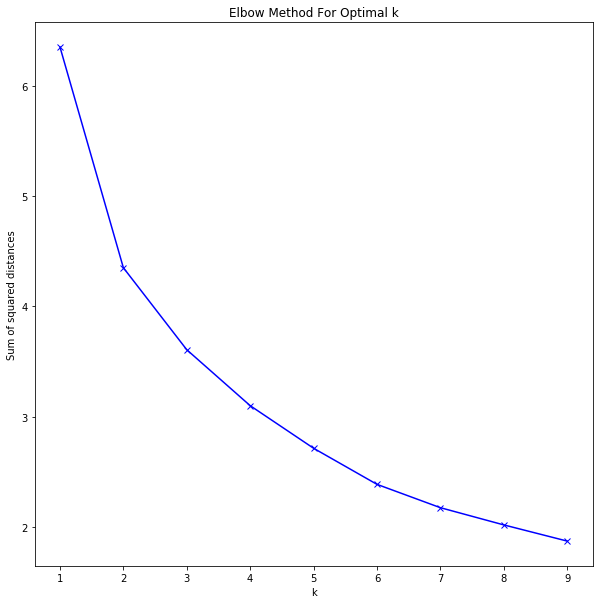

In [18]:
plt.figure(figsize=(10,10))
plt.plot(K, rss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

This now suggests 4 or 5 cluster solution is best

495
495


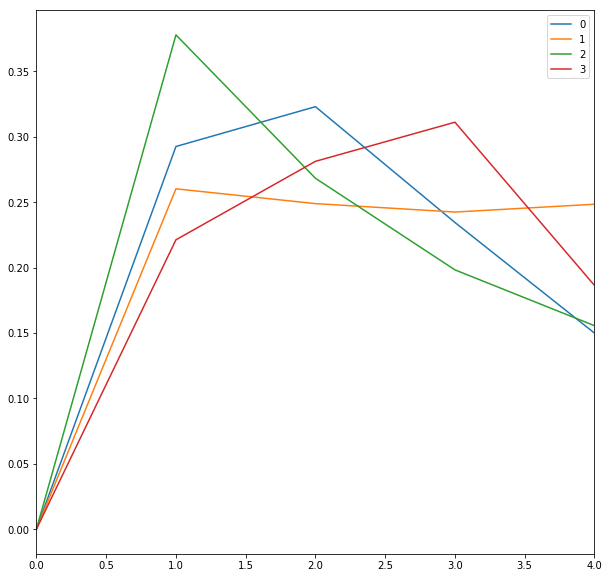

In [18]:
from sklearn.cluster import KMeans
player_games = total_games[total_games['total_games']>=200]['Player_ID']
df_for_cluster = player_stat_df[(player_stat_df['Player_ID'].isin(full_careers.keys())) & player_stat_df['Player_ID'].isin(player_games)].\
                        drop('Player_ID', axis=1)

km = KMeans(4)
km = km.fit(df_for_cluster.filter(regex=("PTS.*")))
pd.DataFrame(km.cluster_centers_).T.plot(figsize=(10,10))
print(len(df_for_cluster))
print(len(km.labels_))

In [19]:
# df_with_cluster = pd.DataFrame(player_stat_df, index=km.labels_).reset_index().rename({'index':'cluster'}, axis=1)
df_with_cluster = player_stat_df[(player_stat_df['Player_ID'].isin(full_careers.keys())) & player_stat_df['Player_ID'].isin(player_games)].\
                        copy()
# df_with_cluster = df_with_cluster.merge(hist_player_info.drop_duplicates(),left_on='Player_ID', right_on='PERSON_ID', how='left')
df_with_cluster['full_name'] = df_with_cluster['Player_ID'].map(full_careers)
df_with_cluster['cluster']= km.labels_
df_with_cluster
df_with_cluster[df_with_cluster['cluster']==3].head()

,Player_ID,career_first_FGM,career_first_FGA,career_first_FG3M,career_first_FTM,career_first_REB,career_first_AST,career_first_STL,career_first_BLK,career_first_PTS,...,career_last_FGA,career_last_FG3M,career_last_FTM,career_last_REB,career_last_AST,career_last_STL,career_last_BLK,career_last_PTS,full_name,cluster
31,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.273026,0.000000,0.168142,0.352419,0.371648,0.278481,0.384615,0.231441,Dickey Simpkins,3
91,147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.202375,0.280832,0.256139,0.196195,0.162069,0.168350,0.106122,0.218329,Jalen Rose,3
143,234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.204885,0.118557,0.239669,0.216216,0.213752,0.252941,0.269231,0.206033,Khalid Reeves,3
149,243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.167070,0.254601,0.118690,0.203486,0.168896,0.168394,0.322034,0.170999,Aaron McKie,3
252,441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113983,0.204545,0.084426,0.147913,0.095597,0.103986,0.110656,0.108883,Lamond Murray,3


In [20]:
top_players = hist_player_log_full.groupby(['full_name'])['date_rank'].max().sort_values(ascending=False).head(100).reset_index()
df_with_cluster[df_with_cluster['full_name'].isin(top_players['full_name'])].head()


,Player_ID,career_first_FGM,career_first_FGA,career_first_FG3M,career_first_FTM,career_first_REB,career_first_AST,career_first_STL,career_first_BLK,career_first_PTS,...,career_last_FGA,career_last_FG3M,career_last_FTM,career_last_REB,career_last_AST,career_last_STL,career_last_BLK,career_last_PTS,full_name,cluster
91,147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.202375,0.280832,0.256139,0.196195,0.162069,0.168350,0.106122,0.218329,Jalen Rose,3
139,224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.147062,0.197665,0.104991,0.196597,0.163725,0.181673,0.100000,0.138341,Eddie Jones,0
156,255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.175865,0.425743,0.144115,0.182935,0.151444,0.159140,0.219907,0.168092,Grant Hill,2
249,436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.075034,0.000000,0.055779,0.115152,0.076923,0.082237,0.094017,0.073267,Juwan Howard,2
264,467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.153871,0.293452,0.082110,0.179233,0.189021,0.222844,0.266304,0.153174,Jason Kidd,0


# Reduce the stat dimensions with PCA

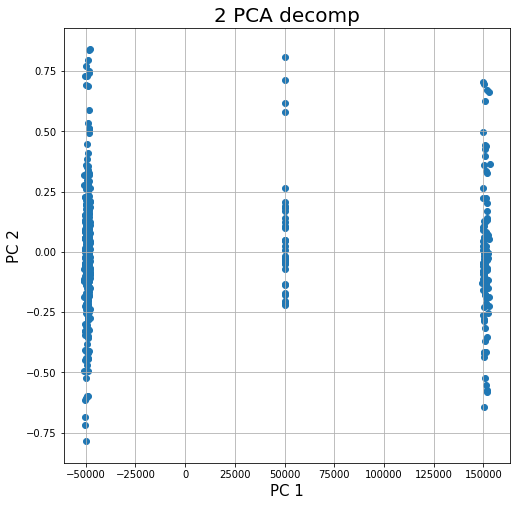

In [21]:
from sklearn.decomposition import PCA
data_for_pca = player_stat_df[(player_stat_df['Player_ID'].isin(full_careers.keys())) & player_stat_df['Player_ID'].isin(player_games)]
pca = PCA(2)
pca.fit(data_for_pca)
data_for_pca=pca.transform(data_for_pca)
principalDf = pd.DataFrame(data = data_for_pca
             , columns = ['principal component 1', 'principal component 2'])
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2 PCA decomp', fontsize = 20)
ax.scatter(principalDf['principal component 1']
               , principalDf['principal component 2'])
ax.grid()